In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
%matplotlib inline

pd.set_option("display.max_rows", None)
np.random.seed(42)

# Data Preparation

In [2]:
# import the dataset

currency_df = pd.read_csv('currency_exchange_rates_02-01-1995_-_02-05-2018.csv')
currency_df.head(5)

,Date,Algerian Dinar,Australian Dollar,Bahrain Dinar,Bolivar Fuerte,Botswana Pula,Brazilian Real,Brunei Dollar,Canadian Dollar,Chilean Peso,...,South African Rand,Sri Lanka Rupee,Swedish Krona,Swiss Franc,Thai Baht,Trinidad And Tobago Dollar,Tunisian Dinar,U.A.E. Dirham,U.K. Pound Sterling,U.S. Dollar
0,1995-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1995-1-3,NaN,NaN,0.376,NaN,NaN,0.843,NaN,1.4035,NaN,...,3.55,50.04,7.4588,1.3168,25.10,5.8750,NaN,3.671,1.5617,1.0
2,1995-1-4,NaN,0.7704,0.376,NaN,NaN,0.844,NaN,1.4026,NaN,...,3.56,50.07,7.4480,1.3161,25.13,5.8738,NaN,3.671,1.5605,1.0
3,1995-1-5,NaN,0.7693,0.376,NaN,NaN,0.844,NaN,1.4002,NaN,...,3.55,50.07,7.4450,1.3080,25.14,5.8700,NaN,3.671,1.5610,1.0
4,1995-1-6,NaN,0.7699,0.376,NaN,NaN,0.842,NaN,1.4002,NaN,...,3.56,50.07,NaN,1.3040,25.13,5.8810,NaN,3.671,1.5645,1.0


In [3]:
# create a subset of currencies

currency_subset_df = currency_df[['Date', 'Australian Dollar', 
       'Brazilian Real', 'Canadian Dollar', 'Chinese Yuan', 'Euro', 'Indian Rupee',
       'Iranian Rial', 'Israeli New Sheqel', 'Japanese Yen', 
       'Korean Won', 'Malaysian Ringgit', 'Mexican Peso',  
       'Saudi Arabian Riyal', 'Singapore Dollar',
       'South African Rand', 'Swedish Krona', 'Swiss Franc',
       'Thai Baht',  'U.K. Pound Sterling', 'U.S. Dollar']]

currency_subset_df.head(5)

,Date,Australian Dollar,Brazilian Real,Canadian Dollar,Chinese Yuan,Euro,Indian Rupee,Iranian Rial,Israeli New Sheqel,Japanese Yen,...,Malaysian Ringgit,Mexican Peso,Saudi Arabian Riyal,Singapore Dollar,South African Rand,Swedish Krona,Swiss Franc,Thai Baht,U.K. Pound Sterling,U.S. Dollar
0,1995-1-2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1,1995-1-3,NaN,0.843,1.4035,NaN,NaN,31.37,1753.998616,NaN,NaN,...,2.5525,NaN,3.745,1.4563,3.55,7.4588,1.3168,25.10,1.5617,1.0
2,1995-1-4,0.7704,0.844,1.4026,NaN,NaN,31.37,1753.525647,NaN,100.98,...,2.5510,NaN,3.745,1.4537,3.56,7.4480,1.3161,25.13,1.5605,1.0
3,1995-1-5,0.7693,0.844,1.4002,NaN,NaN,31.37,1746.890000,NaN,101.00,...,2.5488,NaN,3.745,1.4520,3.55,7.4450,1.3080,25.14,1.5610,1.0
4,1995-1-6,0.7699,0.842,1.4002,NaN,NaN,31.37,1744.746721,NaN,100.95,...,2.5497,NaN,3.745,1.4527,3.56,NaN,1.3040,25.13,1.5645,1.0


In [4]:
# kick out everything before the inception of the EURO on 30-10-1998 (index = 992)

currency_subset_euro_df = currency_subset_df.iloc[992:, :]
currency_subset_euro_df.head(5)

,Date,Australian Dollar,Brazilian Real,Canadian Dollar,Chinese Yuan,Euro,Indian Rupee,Iranian Rial,Israeli New Sheqel,Japanese Yen,...,Malaysian Ringgit,Mexican Peso,Saudi Arabian Riyal,Singapore Dollar,South African Rand,Swedish Krona,Swiss Franc,Thai Baht,U.K. Pound Sterling,U.S. Dollar
992,1998-10-30,0.6263,1.1914,1.5425,NaN,1.18398,42.37,1751.65264,NaN,116.40,...,3.8,NaN,3.745,1.622,5.6570,7.8230,1.3459,36.771,1.6773,1.0
993,1998-11-2,0.6259,NaN,1.5318,NaN,1.18373,42.30,1751.36597,NaN,115.30,...,3.8,NaN,3.745,1.619,5.6165,7.7490,1.3477,36.683,1.6676,1.0
994,1998-11-3,0.6237,1.1924,1.5238,8.2777,1.17525,42.29,1755.43923,NaN,NaN,...,3.8,NaN,3.745,1.624,5.6015,7.8235,1.3561,36.679,1.6552,1.0
995,1998-11-4,0.6308,1.1921,1.5238,NaN,1.17110,42.29,1759.42190,NaN,115.85,...,3.8,NaN,3.745,1.621,5.5965,7.8133,1.3689,36.575,1.6527,1.0
996,1998-11-5,0.6314,1.1908,1.5176,NaN,1.17706,42.35,1750.01488,NaN,117.60,...,3.8,NaN,3.745,1.624,5.5865,7.8080,1.3639,36.442,1.6594,1.0


In [5]:
# fill NaNs with bfill

currency_subset_euro_df = currency_subset_euro_df.fillna(method='bfill')

# now fill all NaNs at the end
currency_subset_euro_df = currency_subset_euro_df.fillna(method='ffill')

currency_subset_euro_df.head(5)

,Date,Australian Dollar,Brazilian Real,Canadian Dollar,Chinese Yuan,Euro,Indian Rupee,Iranian Rial,Israeli New Sheqel,Japanese Yen,...,Malaysian Ringgit,Mexican Peso,Saudi Arabian Riyal,Singapore Dollar,South African Rand,Swedish Krona,Swiss Franc,Thai Baht,U.K. Pound Sterling,U.S. Dollar
992,1998-10-30,0.6263,1.1914,1.5425,8.2777,1.18398,42.37,1751.65264,4.217,116.40,...,3.8,9.9998,3.745,1.622,5.6570,7.8230,1.3459,36.771,1.6773,1.0
993,1998-11-2,0.6259,1.1924,1.5318,8.2777,1.18373,42.30,1751.36597,4.217,115.30,...,3.8,9.9998,3.745,1.619,5.6165,7.7490,1.3477,36.683,1.6676,1.0
994,1998-11-3,0.6237,1.1924,1.5238,8.2777,1.17525,42.29,1755.43923,4.217,115.85,...,3.8,9.9998,3.745,1.624,5.6015,7.8235,1.3561,36.679,1.6552,1.0
995,1998-11-4,0.6308,1.1921,1.5238,8.2777,1.17110,42.29,1759.42190,4.217,115.85,...,3.8,9.9998,3.745,1.621,5.5965,7.8133,1.3689,36.575,1.6527,1.0
996,1998-11-5,0.6314,1.1908,1.5176,8.2777,1.17706,42.35,1750.01488,4.217,117.60,...,3.8,9.9998,3.745,1.624,5.5865,7.8080,1.3639,36.442,1.6594,1.0


In [6]:
import datetime as dt

currency_subset_euro_df['Date'] = pd.to_datetime(currency_subset_euro_df['Date'], errors='coerce')

currency_subset_euro_df['Day'] = currency_subset_euro_df['Date'].dt.day
currency_subset_euro_df['Month'] = currency_subset_euro_df['Date'].dt.month
currency_subset_euro_df['Year'] = currency_subset_euro_df['Date'].dt.year

currency_subset_euro_df = currency_subset_euro_df.reset_index(drop=True)
currency_subset_euro_df.head(5)

,Date,Australian Dollar,Brazilian Real,Canadian Dollar,Chinese Yuan,Euro,Indian Rupee,Iranian Rial,Israeli New Sheqel,Japanese Yen,...,Singapore Dollar,South African Rand,Swedish Krona,Swiss Franc,Thai Baht,U.K. Pound Sterling,U.S. Dollar,Day,Month,Year
0,1998-10-30,0.6263,1.1914,1.5425,8.2777,1.18398,42.37,1751.65264,4.217,116.40,...,1.622,5.6570,7.8230,1.3459,36.771,1.6773,1.0,30,10,1998
1,1998-11-02,0.6259,1.1924,1.5318,8.2777,1.18373,42.30,1751.36597,4.217,115.30,...,1.619,5.6165,7.7490,1.3477,36.683,1.6676,1.0,2,11,1998
2,1998-11-03,0.6237,1.1924,1.5238,8.2777,1.17525,42.29,1755.43923,4.217,115.85,...,1.624,5.6015,7.8235,1.3561,36.679,1.6552,1.0,3,11,1998
3,1998-11-04,0.6308,1.1921,1.5238,8.2777,1.17110,42.29,1759.42190,4.217,115.85,...,1.621,5.5965,7.8133,1.3689,36.575,1.6527,1.0,4,11,1998
4,1998-11-05,0.6314,1.1908,1.5176,8.2777,1.17706,42.35,1750.01488,4.217,117.60,...,1.624,5.5865,7.8080,1.3639,36.442,1.6594,1.0,5,11,1998


In [7]:
currency_subset_euro_df.columns

Index(['Date', 'Australian Dollar', 'Brazilian Real', 'Canadian Dollar',
       'Chinese Yuan', 'Euro', 'Indian Rupee', 'Iranian Rial',
       'Israeli New Sheqel', 'Japanese Yen', 'Korean Won', 'Malaysian Ringgit',
       'Mexican Peso', 'Saudi Arabian Riyal', 'Singapore Dollar',
       'South African Rand', 'Swedish Krona', 'Swiss Franc', 'Thai Baht',
       'U.K. Pound Sterling', 'U.S. Dollar', 'Day', 'Month', 'Year'],
      dtype='object')

In [8]:
# let's plot this mess

dates = currency_subset_euro_df['Date']
years = currency_subset_euro_df['Year']
australian_dollar = currency_subset_euro_df['Australian Dollar']
brazilian_real = currency_subset_euro_df['Brazilian Real']
canadian_dollar = currency_subset_euro_df['Canadian Dollar']
chinese_yuan = currency_subset_euro_df['Chinese Yuan']
euro = currency_subset_euro_df['Euro']
indian_rupee = currency_subset_euro_df['Indian Rupee']
iranian_rial = currency_subset_euro_df['Iranian Rial']
israeli_sheqel = currency_subset_euro_df['Israeli New Sheqel']
japanese_yen = currency_subset_euro_df['Japanese Yen']
korean_won = currency_subset_euro_df['Korean Won']
malaysian_ringgit = currency_subset_euro_df['Malaysian Ringgit']
mexican_peso = currency_subset_euro_df['Mexican Peso']
saudi_arabian_riyal = currency_subset_euro_df['Saudi Arabian Riyal']
singapore_dollar = currency_subset_euro_df['Singapore Dollar']
south_african_rand = currency_subset_euro_df['South African Rand']
swedish_krona = currency_subset_euro_df['Swedish Krona']
swiss_franc = currency_subset_euro_df['Swiss Franc']
thai_baht = currency_subset_euro_df['Thai Baht']
UK_pound = currency_subset_euro_df['U.K. Pound Sterling']
US_dollar = currency_subset_euro_df['U.S. Dollar']


In [9]:
value_counts = currency_subset_euro_df['Year'].value_counts()

year_idxs = []
idx = 0
for y in range(min(years), max(years)+1):
    year_idxs.append(idx)
    idx += value_counts[y]
    
    
print(year_idxs)

year_labels = years[year_idxs].values
print(year_labels)

[0, 44, 304, 563, 823, 1084, 1343, 1603, 1863, 2122, 2381, 2641, 2900, 3152, 3403, 3652, 3901, 4151, 4401, 4652, 4901]
[1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015 2016 2017 2018]


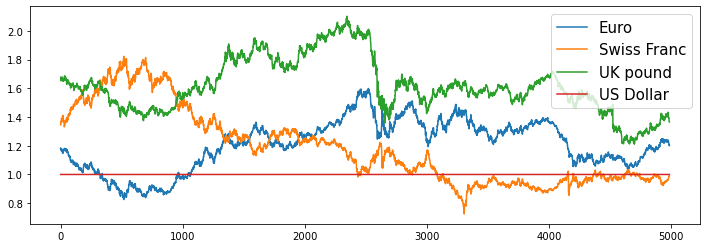

In [10]:
plt.figure(figsize=(12, 4))
legend_size= 15

#plt.plot(australian_dollar, label="Australian Dollar")
#plt.plot(brazilian_real, label="Brazilian Real")
#plt.plot(canadian_dollar, label="Canadian Dollar")
#plt.plot(chinese_yuan, label="Chinese Yuan")
plt.plot(euro, label="Euro")
#plt.plot(indian_rupee, label="Indian Rupee")
#plt.plot(iranian_rial, label="Iranian Rial")
#plt.plot(israeli_sheqel, label="Isreali New Sheqel")
#plt.plot(japanese_yen, label="Japanese Yen")
#plt.plot(korean_won, label="Korean Won")
#plt.plot(malaysian_ringgit, label="Malaysian Ringgit")
#plt.plot(mexican_peso, label="Mexican Peso")
#plt.plot(saudi_arabian_riyal, label="Saudi Arabian Riyal")
#plt.plot(singapore_dollar, label="Singapore Dollar")
#plt.plot(south_african_rand, label="South African Rand")
#plt.plot(swedish_krona, label="Swedish Krona")
plt.plot(swiss_franc, label="Swiss Franc")
#plt.plot(thai_baht, label="Thai Baht")
plt.plot(UK_pound, label="UK pound")
plt.plot(US_dollar, label="US Dollar")

plt.legend(prop={'size': legend_size})
plt.show();

In [12]:
len(US_dollar)

4986

In [13]:
#plot the covariances for the EURO

covariances_ad = []
covariances_emp = []

for index, row in currency_subset_euro_df.iterrows():
    
    z_i = row[['Euro', 'Swiss Franc', 'U.K. Pound Sterling', 'U.S. Dollar']]
    
    #mu_i = z_i.mean()
    mu_i = 0
    x_i = np.outer(z_i - mu_i, z_i - mu_i)
    
    covariances_emp.append(x_i)
    covariances_ad.append(x_i[:,0])

In [14]:
covariances_ad = np.array(covariances_ad)

cov_ad_euro = covariances_ad[:,0]
cov_ad_sf = covariances_ad[:,1]
cov_ad_pound = covariances_ad[:,2]
cov_ad_dollar = covariances_ad[:,3]

n_curr = 4

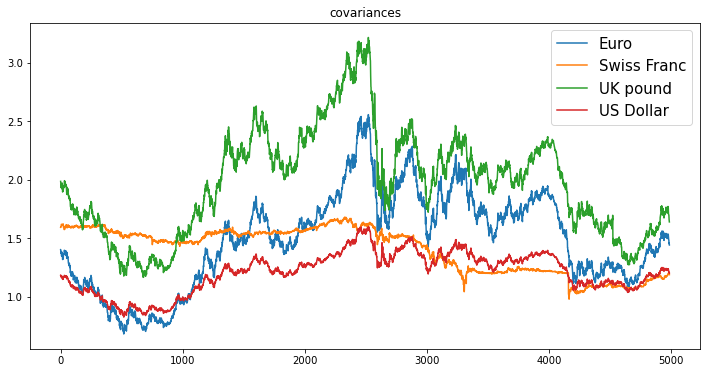

In [15]:
plt.figure(figsize=(12, 6))
legend_size = 15

plt.plot(cov_ad_euro, label="Euro")
plt.plot(cov_ad_sf, label="Swiss Franc")
plt.plot(cov_ad_pound, label="UK pound")
plt.plot(cov_ad_dollar, label="US Dollar")
plt.title("covariances")

plt.legend(prop={'size': legend_size});
plt.show();

In [17]:
currency_subset_euro_df = currency_subset_euro_df[['Date', 'Euro', 'Swiss Franc', 'U.K. Pound Sterling', 'U.S. Dollar', 'Day', 'Month', 'Year']]
currency_subset_euro_df.head()

,Date,Euro,Swiss Franc,U.K. Pound Sterling,U.S. Dollar,Day,Month,Year
0,1998-10-30,1.18398,1.3459,1.6773,1.0,30,10,1998
1,1998-11-02,1.18373,1.3477,1.6676,1.0,2,11,1998
2,1998-11-03,1.17525,1.3561,1.6552,1.0,3,11,1998
3,1998-11-04,1.17110,1.3689,1.6527,1.0,4,11,1998
4,1998-11-05,1.17706,1.3639,1.6594,1.0,5,11,1998


In [19]:
# save values
currency_subset_euro_df.to_csv("currencies.csv", index=False)